- 케글 데이터 : https://www.kaggle.com/competitions/word2vec-nlp-tutorial/code

In [1]:
# https://drive.google.com/file/d/17o0eEJgZx8q9oUc7kGHDjQSGt7UBhkY8/view?usp=sharing

import gdown
file_id = '17o0eEJgZx8q9oUc7kGHDjQSGt7UBhkY8'
download_url = f'https://drive.google.com/uc?id={file_id}'
gdown.download(download_url, 'word2vec-nlp-tutorial.zip', quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=17o0eEJgZx8q9oUc7kGHDjQSGt7UBhkY8
From (redirected): https://drive.google.com/uc?id=17o0eEJgZx8q9oUc7kGHDjQSGt7UBhkY8&confirm=t&uuid=170ac3f9-3b84-4aed-adcc-0f5f6aa50350
To: /content/word2vec-nlp-tutorial.zip
100%|██████████| 54.2M/54.2M [00:00<00:00, 60.8MB/s]


'word2vec-nlp-tutorial.zip'

In [1]:
# 데이터 전처리
# <br> 인터넷에서 수집한데이터라면..... html 문서 제거
# 소문자로 변경
# 영문 소문자만 정규식으로 처리 - 구두점제거 및 특수문자 제거
# 공백을 기준으로 토큰화
# 불용어 제거 stopword  전치사,부사,형용자 in the at .....is
# 단어들은 다시 공백을 기준으로 문장형태로 묶어준다.
########### - 기본 전처리 종료 #################
# 단어를 벡터화 (tfidf, word2vec, countervecterize)
# 기계학습

In [2]:
!unzip /content/word2vec-nlp-tutorial.zip

Archive:  /content/word2vec-nlp-tutorial.zip
  inflating: labeledTrainData.tsv.zip  
  inflating: sampleSubmission.csv    
  inflating: testData.tsv.zip        
  inflating: unlabeledTrainData.tsv.zip  


In [3]:
! unzip /content/labeledTrainData.tsv.zip

Archive:  /content/labeledTrainData.tsv.zip
  inflating: labeledTrainData.tsv    


In [20]:
import pandas as pd
df = pd.read_csv('/content/labeledTrainData.tsv', header=0, delimiter='\t', quoting=3)
df.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [21]:
#  html 문서 제거
import re
from bs4 import BeautifulSoup
review = df['review'].apply(lambda x: BeautifulSoup(x, 'html5lib').get_text())

<ipython-input-21-14abf4a23fc6>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review = df['review'].apply(lambda x: BeautifulSoup(x, 'html5lib').get_text())


In [22]:
# 소문자로 변경
review = review.apply(lambda x: x.lower())
review

,review
0,"""with all this stuff going down at the moment ..."
1,"""\""the classic war of the worlds\"" by timothy ..."
2,"""the film starts with a manager (nicholas bell..."
3,"""it must be assumed that those who praised thi..."
4,"""superbly trashy and wondrously unpretentious ..."
...,...
24995,"""it seems like more consideration has gone int..."
24996,"""i don't believe they made this film. complete..."
24997,"""guy is a loser. can't get girls, needs to bui..."
24998,"""this 30 minute documentary buñuel made in the..."


In [23]:
# 영문 소문자만 정규식으로 처리 - 구두점제거 및 특수문자 제거
import re
review = review.apply(lambda x: re.sub('[^a-z]', ' ', x))
review

,review
0,with all this stuff going down at the moment ...
1,the classic war of the worlds by timothy ...
2,the film starts with a manager nicholas bell...
3,it must be assumed that those who praised thi...
4,superbly trashy and wondrously unpretentious ...
...,...
24995,it seems like more consideration has gone int...
24996,i don t believe they made this film complete...
24997,guy is a loser can t get girls needs to bui...
24998,this minute documentary bu uel made in the...


In [25]:
# 불용어 제거 stopword  전치사,부사,형용자 in the at .....is
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
review = review.apply(lambda x: [word for word in x.split() if word not in stop_words])
review


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,review
0,"[stuff, going, moment, mj, started, listening,..."
1,"[classic, war, worlds, timothy, hines, enterta..."
2,"[film, starts, manager, nicholas, bell, giving..."
3,"[must, assumed, praised, film, greatest, filme..."
4,"[superbly, trashy, wondrously, unpretentious, ..."
...,...
24995,"[seems, like, consideration, gone, imdb, revie..."
24996,"[believe, made, film, completely, unnecessary,..."
24997,"[guy, loser, get, girls, needs, build, picked,..."
24998,"[minute, documentary, bu, uel, made, early, on..."


In [26]:
# 단어들은 다시 공백을 기준으로 문장형태로 묶어준다.
review = review.apply(lambda x: ' '.join(x))
review

,review
0,stuff going moment mj started listening music ...
1,classic war worlds timothy hines entertaining ...
2,film starts manager nicholas bell giving welco...
3,must assumed praised film greatest filmed oper...
4,superbly trashy wondrously unpretentious explo...
...,...
24995,seems like consideration gone imdb reviews fil...
24996,believe made film completely unnecessary first...
24997,guy loser get girls needs build picked stronge...
24998,minute documentary bu uel made early one spain...


In [27]:
# tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(review)
y = df['sentiment']

In [29]:
tfidf_x = X; tfidf_y = y

In [31]:
# word2vec
# 각 단어간의 벡터를 합산해서 평균하고 최종 특징 벡터를 계산
import numpy as np
def get_features(words,model,num_features):
  # 벡터 초기화
  feature_vector = np.zeros( num_features,dtype=np.float32 )
  # 단어카운트
  num_words = 0
  # 단어 인덱스 집합
  index2word_set = set(model.wv.index_to_key)
  for w in words: # 주어진 단어 목록 반환
    if w in index2word_set: # 단어가 모델에 있는경우
      num_words += 1 # 단어수 증가
      # 특정벡터에 단어벡터를 추가
      feature_vector = np.add(feature_vector,model.wv[w])
  if num_words > 0 : # 유효한 단어가 있는겨웅
    feature_vector = np.divide(feature_vector,num_words) # 특정 벡터를 단어수로 나누어서평
  return feature_vector  # 최종 특징 벡터를 반환

# 리뷰목록을 입력받아서 각  리뷰에 대한 특징 벡터를 생성
def get_dataset(reviews,model,num_features):
  dataset = list() # 특징 벡터를 저장할 리스트
  for s in reviews: # 각 리뷰
    dataset.append(get_features(s,model,num_features))  # 각 리뷰의 특징벡터를 계산하고 리스트에 추가
  reviewFeatureVecs = np.stack(dataset) # 리스트를 넘파이 배열로 변환
  return reviewFeatureVecs
num_features = 300


In [32]:
# CountVectorizer 적용
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000)
countervector_X = cv.fit_transform(review)
countervector_y = df['sentiment']

In [33]:
# 머신러닝
# LogisticRegression, RendomForest

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [38]:
tfidf_y.value_counts()

,count
sentiment,
1,12500
0,12500


In [39]:
# tfidf
X_train, X_test, y_train, y_test = train_test_split(tfidf_x, tfidf_y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
model = RandomForestClassifier()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.8842
0.848


In [40]:
X_train, X_test, y_train, y_test = train_test_split(countervector_X, countervector_y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
model = RandomForestClassifier()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.859
0.841


In [43]:
from gensim.models import Word2Vec
sentencs = review.apply(lambda x: x.split())

In [44]:
num_features = 300
model = Word2Vec(sentencs,
         workers=4,  # 코어수
         vector_size=num_features, # 벡터의 차원, 크기 , 100 200 300
         min_count=40, # 학습할때 최소단어 빈도수
         window=10, # 중심단어의 왼쪽과 오른쪽에 포하될 단어의 최대 개수
         sample=1e-3 # 0.001 드물게 나오는 단어의 비율을 줄이는데 사용
         )

X = get_dataset(sentencs,model,num_features)
y = df['sentiment']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
model = RandomForestClassifier()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.864
0.8464


In [46]:
# 대부분 데이터 벡터화는 TF-IDF 를 선호

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      2481
           1       0.88      0.90      0.89      2519

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000

0.8838990540093596


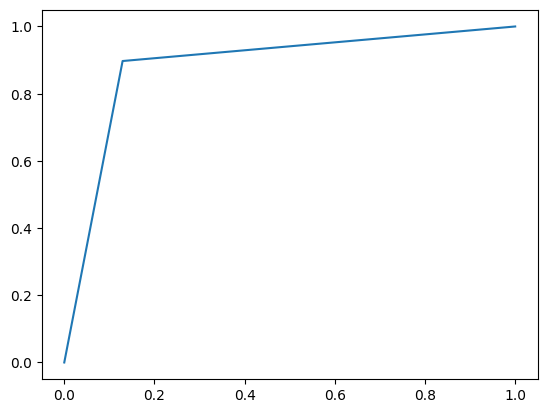

In [49]:
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(tfidf_x, tfidf_y, test_size=0.2, random_state=42)
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
# auc roc 값 구하기
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred))
# roc auc 시각화
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.show()